## TF Representation

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from nltk import word_tokenize

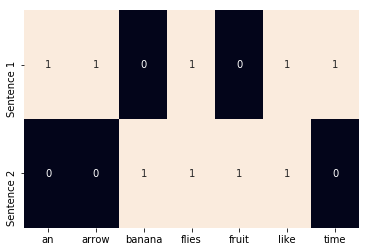

In [37]:
corpus = ['Time flies flies like an arrow.','Fruit flies like a banana.']
one_hot_vectorized = CountVectorizer(binary=True)
one_hot = one_hot_vectorized.fit_transform(corpus).toarray()
vocab = one_hot_vectorized.get_feature_names()
sns.heatmap(one_hot, annot=True, xticklabels=vocab, 
            yticklabels=['Sentence 1', 'Sentence 2'], cbar=False)

# TF-IDF Representation

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

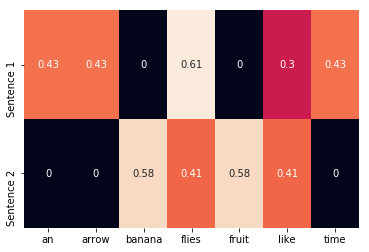

In [39]:
tfid_vectorizer = TfidfVectorizer()
tfidf = tfid_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, xticklabels=vocab,
           yticklabels=['Sentence 1', 'Sentence 2'], cbar=False)

## PyTorch Tensors!

In [42]:
import torch
import numpy as np

In [43]:
def describe(x):
    print('Type: {}'.format(x.type()))
    print('Shape/size: {}'.format(x.shape))
    print('Values: \n{}'.format(x))

In [44]:
describe(torch.Tensor(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[ 2.7517e+12,  7.5338e+28, -7.4228e-03],
        [ 6.0536e-43,  9.1042e-12,  6.2609e+22]])


In [46]:
x = torch.FloatTensor([[2, 3, 4], 
                     [5, 6, 7]])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[2., 3., 4.],
        [5., 6., 7.]])


In [48]:
x = x.long()
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[2, 3, 4],
        [5, 6, 7]])


In [49]:
x = torch.arange(6)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([6])
Values: 
tensor([0, 1, 2, 3, 4, 5])


In [50]:
x = x.view(2, 3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [51]:
describe(torch.sum(x, dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])


In [52]:
describe(torch.sum(x, dim=1))

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([ 3, 12])


In [68]:
describe(torch.transpose(x, 1, 0))
describe(torch.transpose(x, 0, 1))

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])
Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [69]:
describe (x[:1, :2])

Type: torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: 
tensor([[0, 1]])


In [73]:
describe(x [1, 2])

Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
5


In [74]:
indices = torch.LongTensor([0, 0])
describe(torch.index_select(x, dim = 0, index=indices))

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [80]:
describe(torch.index_select(x, dim = 1, index=torch.LongTensor([0, 2])))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [3, 5]])


In [81]:
row_indices = torch.LongTensor([0, 1])
col_indices = torch.LongTensor([0, 1])
describe(x[row_indices, col_indices])

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([0, 4])


In [82]:
describe(torch.cat([x, x], dim = 0))

Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [83]:
describe(torch.cat([x, x], dim = 1))

Type: torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [84]:
describe(torch.stack([x, x]))

Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [114]:
x = torch.ones([2, 3], requires_grad=True)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [115]:
new_x = x * 2 + x * 5 + 3
describe(new_x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[10., 10., 10.],
        [10., 10., 10.]], grad_fn=<AddBackward0>)


In [116]:
z = new_x.mean()
print(z)
z.backward()
print(z)
print(x.grad)

tensor(10., grad_fn=<MeanBackward1>)
tensor(10., grad_fn=<MeanBackward1>)
tensor([[1.1667, 1.1667, 1.1667],
        [1.1667, 1.1667, 1.1667]])


In [117]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [124]:
x = torch.ones(3, 3)
x = x.unsqueeze(0)
describe(x)
x = x.squeeze(0)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([1, 3, 3])
Values: 
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [126]:
x = torch.rand([3, 3]) * (7 - 3) + 3
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[6.7511, 4.3177, 6.9477],
        [6.5281, 4.7511, 4.5557],
        [6.6831, 3.5642, 6.3777]])


In [129]:
x = torch.rand(3, 3)
describe(x.normal_())

Type: torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[ 1.3808, -0.7853, -0.3246],
        [-1.9296,  1.5346, -0.7110],
        [ 0.3466,  0.4187, -1.1212]])


In [131]:
x = torch.Tensor([-1, 0, 0, 1, 0])
describe(x.nonzero())

Type: torch.LongTensor
Shape/size: torch.Size([2, 1])
Values: 
tensor([[0],
        [3]])


In [132]:
x = torch.rand(3, 1)
describe(x.expand(3, 4))

Type: torch.FloatTensor
Shape/size: torch.Size([3, 4])
Values: 
tensor([[0.0413, 0.0413, 0.0413, 0.0413],
        [0.0747, 0.0747, 0.0747, 0.0747],
        [0.1507, 0.1507, 0.1507, 0.1507]])


In [139]:
a = torch.ones(3, 4, 5)
describe(a)
b = torch.ones(3, 5, 4) 
describe(b)
torch.bmm(a, b)

Type: torch.FloatTensor
Shape/size: torch.Size([3, 4, 5])
Values: 
tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])
Type: torch.FloatTensor
Shape/size: torch.Size([3, 5, 4])
Values: 
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


tensor([[[5., 5., 5., 5.],
         [5., 5., 5., 5.],
         [5., 5., 5., 5.],
         [5., 5., 5., 5.]],

        [[5., 5., 5., 5.],
         [5., 5., 5., 5.],
         [5., 5., 5., 5.],
         [5., 5., 5., 5.]],

        [[5., 5., 5., 5.],
         [5., 5., 5., 5.],
         [5., 5., 5., 5.],
         [5., 5., 5., 5.]]])